In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

In [15]:
ckt = QuantumCircuit(2)
ckt.h(0)
ckt.t(0)
ckt.s(1)
display(ckt.draw())

┌───┐┌───┐
q_0: ┤ H ├┤ T ├
     ├───┤└───┘
q_1: ┤ S ├─────
     └───┘

In [27]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")
circuit = QuantumCircuit(Y, X, A, B)
circuit.h(Y)
circuit.cx(X, Y)
circuit.measure(X, A)
circuit.measure(Y, B)
display(circuit.draw())

┌───┐┌───┐      ┌─┐
  Y: ┤ H ├┤ X ├─X────┤M├
     └───┘└─┬─┘ │ ┌─┐└╥┘
  X: ───────■───X─┤M├─╫─
                  └╥┘ ║ 
A: 1/══════════════╩══╬═
                   0  ║ 
B: 1/═════════════════╩═
                      0

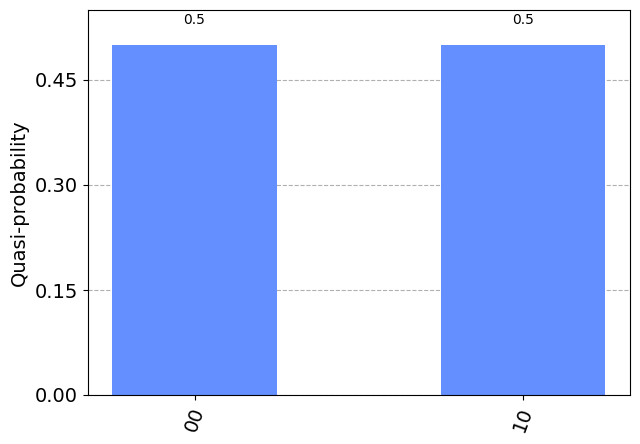

In [24]:
results = Sampler().run(circuit).result()
stats = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(stats))